In [2]:
# collect data from SEC website
# We need the 10K report.

import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# create a header
headers = {
    'User-Agent': 'mazsikafan@gmail.com'
}
company_tickers = requests.get('https://sec.gov/files/company_tickers.json',headers=headers)


In [5]:
# review response and keys

company_tickers.json().keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [4]:
# make the first entry
first_entry = company_tickers.json()["0"]
first_entry 

{'cik_str': 789019, 'ticker': 'MSFT', 'title': 'MICROSOFT CORP'}

In [5]:
# parse CIK without leading zeros
direct_cik = company_tickers.json()["0"]["cik_str"]
direct_cik

789019

In [6]:
companydata = pd.DataFrame.from_dict(company_tickers.json(), orient='index')

companydata['cik_str'] = companydata['cik_str'].astype(str).str.zfill(10)

companydata[:10]

cik_str ticker                                      title
0  0000789019   MSFT                             MICROSOFT CORP
1  0000320193   AAPL                                 Apple Inc.
2  0001652044  GOOGL                              Alphabet Inc.
3  0001045810   NVDA                                NVIDIA CORP
4  0001018724   AMZN                             AMAZON COM INC
5  0001326801   META                       Meta Platforms, Inc.
6  0001067983  BRK-B                     BERKSHIRE HATHAWAY INC
7  0000059478    LLY                             ELI LILLY & Co
8  0001046179    TSM  TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD
9  0001730168   AVGO                              Broadcom Inc.

In [21]:
cik = companydata[3:4].cik_str.values[0] 
cik

'0001045810'

In [22]:
fillingmetadata = requests.get(f'https://data.sec.gov/submissions/CIK{cik}.json',headers=headers)
fillingmetadata.json()['filings']

{'recent': {'accessionNumber': ['0001045810-24-000029',
   '0001045810-24-000028',
   '0001045810-24-000021',
   '0001104659-24-021596',
   '0000315066-24-001331',
   '0001086364-24-004712',
   '0001045810-24-000011',
   '0001045810-24-000009',
   '0001045810-24-000006',
   '0001045810-24-000004',
   '0001950047-24-000178',
   '0001045810-23-000275',
   '0001045810-23-000273',
   '0001045810-23-000272',
   '0001950047-23-006222',
   '0001045810-23-000267',
   '0001045810-23-000265',
   '0001045810-23-000263',
   '0001045810-23-000261',
   '0001045810-23-000258',
   '0001045810-23-000256',
   '0001045810-23-000254',
   '0001921094-23-001080',
   '0001969223-23-000529',
   '0001045810-23-000243',
   '0001045810-23-000242',
   '0001045810-23-000241',
   '0001045810-23-000237',
   '0001045810-23-000235',
   '0001045810-23-000234',
   '0001045810-23-000233',
   '0001045810-23-000232',
   '0001921094-23-000932',
   '0001950047-23-005393',
   '0001921094-23-000910',
   '0001961863-23-000151',

In [23]:
#
allforms = pd.DataFrame.from_dict(fillingmetadata.json()['filings']['recent'])
allforms

accessionNumber  filingDate  reportDate        acceptanceDateTime  \
0     0001045810-24-000029  2024-02-21  2024-01-28  2024-02-21T16:36:57.000Z   
1     0001045810-24-000028  2024-02-21  2024-02-21  2024-02-21T16:22:09.000Z   
2     0001045810-24-000021  2024-02-14  2023-12-31  2024-02-14T16:12:45.000Z   
3     0001104659-24-021596  2024-02-13              2024-02-13T17:09:50.000Z   
4     0000315066-24-001331  2024-02-09              2024-02-09T09:28:31.000Z   
...                    ...         ...         ...                       ...   
998   0001045810-14-000105  2014-05-28  2014-05-27  2014-05-28T18:25:07.000Z   
999   0001045810-14-000104  2014-05-28  2014-05-27  2014-05-28T18:24:49.000Z   
1000  0001045810-14-000103  2014-05-28  2014-05-27  2014-05-28T18:24:34.000Z   
1001  0001045810-14-000102  2014-05-28  2014-05-27  2014-05-28T16:54:16.000Z   
1002  0001045810-14-000101  2014-05-28  2014-05-23  2014-05-28T16:27:50.000Z   

     act      form fileNumber filmNumber      items      size  isXBRL  \
0     34      10-K  000-23985   24660316             11813809       1   
1     34       8-K  000-23985   24659885  2.02,9.01    803595       1   
2     34    13F-HR  028-23915   24638255                 5709       0   
3     34  SC 13G/A  005-56649   24629124                13172       0   
4     34  SC 13G/A  005-56649   24611864                 8415       0   
...   ..       ...        ...        ...        ...       ...     ...   
998              4                                       8056       0   
999              4                                       7414       0   
1000             4                                       5372       0   
1001             4                                      11993       0   
1002  34       8-K  000-23985   14873083  5.02,5.07     89138       0   

      isInlineXBRL                          primaryDocument  \
0                1                        nvda-20240128.htm   
1                1                        nvda-20240221.htm   
2                0           xslForm13F_X02/primary_doc.xml   
3                0                   tv01585-nvidiacorp.htm   
4                0                               filing.txt   
...            ...                                      ...   
998              0  xslF345X03/wf-form4_140131589580393.xml   
999              0  xslF345X03/wf-form4_140131587877253.xml   
1000             0  xslF345X03/wf-form4_140131586319201.xml   
1001             0  xslF345X03/wf-form4_140131044534451.xml   
1002             0             form8-k2014annualmeeting.htm   

     primaryDocDescription  
0                     10-K  
1                      8-K  
2                           
3           SCHEDULE 13G/A  
4                           
...                    ...  
998                 FORM 4  
999                 FORM 4  
1000                FORM 4  
1001                FORM 4  
1002              FORM 8-K  

[1003 rows x 14 columns]

In [24]:
allforms.columns

Index(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime',
       'act', 'form', 'fileNumber', 'filmNumber', 'items', 'size', 'isXBRL',
       'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'],
      dtype='object')

In [25]:
allforms[['accessionNumber','reportDate','form']]
# get the 10-K report

tenk = allforms[allforms['form'] == '10-K']
tenk

accessionNumber  filingDate  reportDate        acceptanceDateTime  \
0    0001045810-24-000029  2024-02-21  2024-01-28  2024-02-21T16:36:57.000Z   
150  0001045810-23-000017  2023-02-24  2023-01-29  2023-02-24T17:23:43.000Z   
234  0001045810-22-000036  2022-03-18  2022-01-30  2022-03-17T20:33:34.000Z   
350  0001045810-21-000010  2021-02-26  2021-01-31  2021-02-26T17:03:14.000Z   
471  0001045810-20-000010  2020-02-20  2020-01-26  2020-02-20T16:38:18.000Z   
562  0001045810-19-000023  2019-02-21  2019-01-27  2019-02-21T16:37:18.000Z   
649  0001045810-18-000010  2018-02-28  2018-01-28  2018-02-28T16:31:19.000Z   
740  0001045810-17-000027  2017-03-01  2017-01-29  2017-03-01T17:30:49.000Z   
843  0001045810-16-000205  2016-03-17  2016-01-31  2016-03-16T18:07:18.000Z   
929  0001045810-15-000036  2015-03-12  2015-01-25  2015-03-11T19:48:05.000Z   

    act  form fileNumber filmNumber items      size  isXBRL  isInlineXBRL  \
0    34  10-K  000-23985   24660316        11813809       1             1   
150  34  10-K  000-23985   23668751        13525180       1             1   
234  34  10-K  000-23985   22750748        12667394       1             1   
350  34  10-K  000-23985   21690665        11996719       1             1   
471  34  10-K  000-23985   20635743        12031473       1             1   
562  34  10-K  000-23985   19622362        11434705       1             0   
649  34  10-K  000-23985   18651715        11590519       1             0   
740  34  10-K  000-23985   17655902        13957578       1             0   
843  34  10-K  000-23985  161510725        12102285       1             0   
929  34  10-K  000-23985   15694143        16175203       1             0   

       primaryDocument primaryDocDescription  
0    nvda-20240128.htm                  10-K  
150  nvda-20230129.htm                  10-K  
234  nvda-20220130.htm                  10-K  
350  nvda-20210131.htm           FY2021 10-K  
471  nvda-2020x10k.htm           FY2020 10-K  
562  nvda-2019x10k.htm           FY2019 10-K  
649  nvda-2018x10k.htm           FY2018 10-K  
740  nvda-2017x10k.htm           FY2017 10-K  
843  nvda-2016x10k.htm             FORM 10-K  
929  nvda-2015x10k.htm             FORM 10-K

In [26]:
companyfacts = requests.get(f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json',headers=headers)
companyfacts.json()

{'cik': 1045810,
 'entityName': 'NVIDIA CORP',
 'facts': {'dei': {'EntityCommonStockSharesOutstanding': {'label': 'Entity Common Stock, Shares Outstanding',
    'description': "Indicate number of shares or other units outstanding of each of registrant's classes of capital or common stock or other ownership interests, if and as stated on cover of related periodic report. Where multiple classes or units exist define each class/interest by adding class of stock items such as Common Class A [Member], Common Class B [Member] or Partnership Interest [Member] onto the Instrument [Domain] of the Entity Listings, Instrument.",
    'units': {'shares': [{'end': '2009-08-17',
       'val': 547800000,
       'accn': '0001045810-09-000024',
       'fy': 2009,
       'fp': 'Q2',
       'form': '10-Q',
       'filed': '2009-08-20',
       'frame': 'CY2009Q3I'},
      {'end': '2009-11-17',
       'val': 554900000,
       'accn': '0001045810-09-000036',
       'fy': 2009,
       'fp': 'Q3',
       'form

In [27]:
companyfacts.json()['facts']['us-gaap']['Assets']

{'label': 'Assets',
 'description': 'Sum of the carrying amounts as of the balance sheet date of all assets that are recognized. Assets are probable future economic benefits obtained or controlled by an entity as a result of past transactions or events.',
 'units': {'USD': [{'end': '2009-01-25',
    'val': 3350727000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
    'filed': '2009-08-20'},
   {'end': '2009-01-25',
    'val': 3350727000,
    'accn': '0001045810-09-000036',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
    'filed': '2009-11-19'},
   {'end': '2009-01-25',
    'val': 3350727000,
    'accn': '0001045810-10-000006',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-03-18',
    'frame': 'CY2008Q4I'},
   {'end': '2009-07-26',
    'val': 3298409000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
    'filed': '2009-08-20',
    'frame': 'CY2009Q2I'},
   {'end': '2009-10-

In [28]:
companyconcept = requests.get(f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/Assets.json',headers=headers)

companyconcept.json()

{'cik': 1045810,
 'taxonomy': 'us-gaap',
 'tag': 'Assets',
 'label': 'Assets',
 'description': 'Sum of the carrying amounts as of the balance sheet date of all assets that are recognized. Assets are probable future economic benefits obtained or controlled by an entity as a result of past transactions or events.',
 'entityName': 'NVIDIA CORP',
 'units': {'USD': [{'end': '2009-01-25',
    'val': 3350727000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
    'filed': '2009-08-20'},
   {'end': '2009-01-25',
    'val': 3350727000,
    'accn': '0001045810-09-000036',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
    'filed': '2009-11-19'},
   {'end': '2009-01-25',
    'val': 3350727000,
    'accn': '0001045810-10-000006',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-03-18',
    'frame': 'CY2008Q4I'},
   {'end': '2009-07-26',
    'val': 3298409000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    '

In [29]:
companyconcept.json()['units']['USD']

[{'end': '2009-01-25',
  'val': 3350727000,
  'accn': '0001045810-09-000024',
  'fy': 2009,
  'fp': 'Q2',
  'form': '10-Q',
  'filed': '2009-08-20'},
 {'end': '2009-01-25',
  'val': 3350727000,
  'accn': '0001045810-09-000036',
  'fy': 2009,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2009-11-19'},
 {'end': '2009-01-25',
  'val': 3350727000,
  'accn': '0001045810-10-000006',
  'fy': 2010,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2010-03-18',
  'frame': 'CY2008Q4I'},
 {'end': '2009-07-26',
  'val': 3298409000,
  'accn': '0001045810-09-000024',
  'fy': 2009,
  'fp': 'Q2',
  'form': '10-Q',
  'filed': '2009-08-20',
  'frame': 'CY2009Q2I'},
 {'end': '2009-10-25',
  'val': 3463574000,
  'accn': '0001045810-09-000036',
  'fy': 2009,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2009-11-19',
  'frame': 'CY2009Q3I'},
 {'end': '2010-01-31',
  'val': 3585918000,
  'accn': '0001045810-10-000006',
  'fy': 2010,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2010-03-18'},
 {'end': '2010-01-31',
  'va

In [30]:
companyconcept.json()['units']

{'USD': [{'end': '2009-01-25',
   'val': 3350727000,
   'accn': '0001045810-09-000024',
   'fy': 2009,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2009-08-20'},
  {'end': '2009-01-25',
   'val': 3350727000,
   'accn': '0001045810-09-000036',
   'fy': 2009,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2009-11-19'},
  {'end': '2009-01-25',
   'val': 3350727000,
   'accn': '0001045810-10-000006',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-03-18',
   'frame': 'CY2008Q4I'},
  {'end': '2009-07-26',
   'val': 3298409000,
   'accn': '0001045810-09-000024',
   'fy': 2009,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2009-08-20',
   'frame': 'CY2009Q2I'},
  {'end': '2009-10-25',
   'val': 3463574000,
   'accn': '0001045810-09-000036',
   'fy': 2009,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2009-11-19',
   'frame': 'CY2009Q3I'},
  {'end': '2010-01-31',
   'val': 3585918000,
   'accn': '0001045810-10-000006',
   'fy': 2010,
   'fp': 'FY',
   'form': '10-K',
   

In [31]:
assetsdata = pd.DataFrame.from_dict(companyconcept.json()['units']['USD'])
assets10Q = assetsdata[assetsdata['form'] == '10-Q']
assets10Q.reset_index(drop=True)

end          val                  accn    fy  fp  form       filed  \
0   2009-01-25   3350727000  0001045810-09-000024  2009  Q2  10-Q  2009-08-20   
1   2009-01-25   3350727000  0001045810-09-000036  2009  Q3  10-Q  2009-11-19   
2   2009-07-26   3298409000  0001045810-09-000024  2009  Q2  10-Q  2009-08-20   
3   2009-10-25   3463574000  0001045810-09-000036  2009  Q3  10-Q  2009-11-19   
4   2010-01-31   3585918000  0001045810-10-000018  2010  Q2  10-Q  2010-05-21   
..         ...          ...                   ...   ...  ..   ...         ...   
83  2023-01-29  41182000000  0001045810-23-000175  2024  Q2  10-Q  2023-08-28   
84  2023-01-29  41182000000  0001045810-23-000227  2024  Q3  10-Q  2023-11-21   
85  2023-04-30  44460000000  0001045810-23-000093  2024  Q1  10-Q  2023-05-26   
86  2023-07-30  49555000000  0001045810-23-000175  2024  Q2  10-Q  2023-08-28   
87  2023-10-29  54148000000  0001045810-23-000227  2024  Q3  10-Q  2023-11-21   

        frame  
0         NaN  
1         NaN  
2   CY2009Q2I  
3   CY2009Q3I  
4         NaN  
..        ...  
83        NaN  
84        NaN  
85  CY2023Q1I  
86  CY2023Q2I  
87  CY2023Q3I  

[88 rows x 8 columns]

<Axes: xlabel='end'>

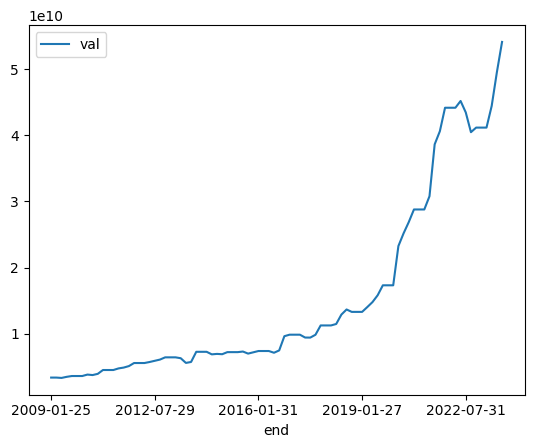

In [32]:
assets10Q.plot(x='end', y='val')

<Axes: xlabel='end'>

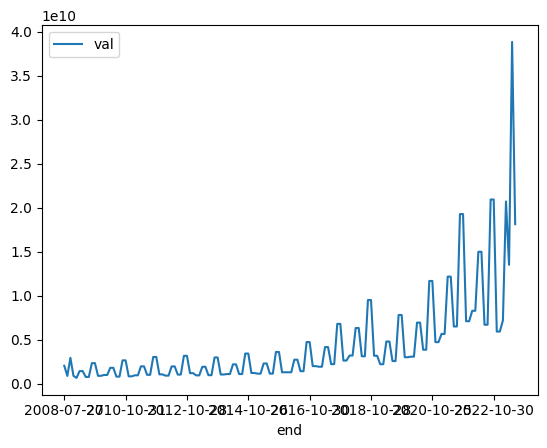

In [34]:
# calculate the revenue growth
revenue = requests.get(f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/Revenues.json',headers=headers)
revenue.json()

revenuedata = pd.DataFrame.from_dict(revenue.json()['units']['USD'])
revenue10Q = revenuedata[revenuedata['form'] == '10-Q']

revenue10Q.plot(x='end', y='val')



/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_29229/2705982238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue10Q['val'] = revenue10Q['val'].astype(float)
/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_29229/2705982238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue10Q['end'] = pd.to_datetime(revenue10Q['end'])


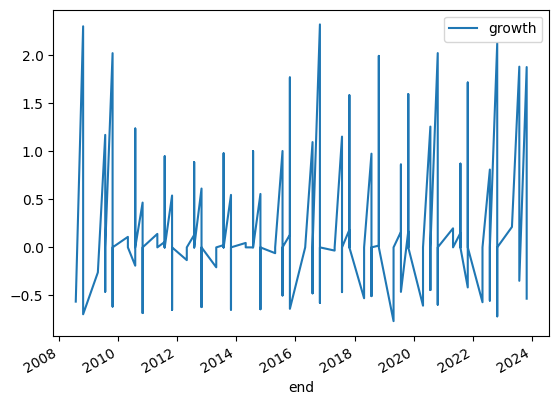

In [35]:
# calculate the growth rate
revenue10Q['val'] = revenue10Q['val'].astype(float)
revenue10Q['end'] = pd.to_datetime(revenue10Q['end'])
revenue10Q = revenue10Q.sort_values(by='end')
revenue10Q['growth'] = revenue10Q['val'].pct_change()
revenue10Q.plot(x='end', y='growth')
plt.show()


In [36]:
# now we can calculate the average growth rate
revenue10Q['growth'].mean()



0.17467428668930002

<Axes: xlabel='end'>

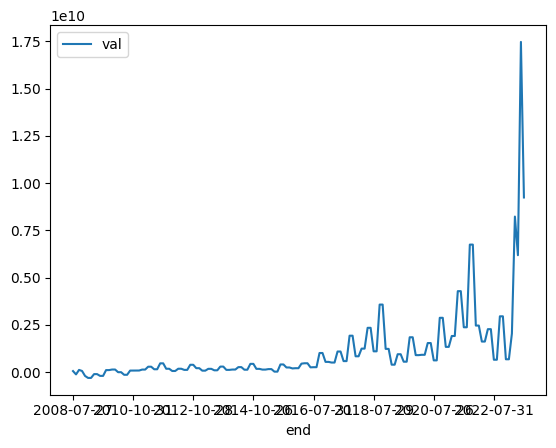

In [48]:
# calculate the net income
netincome = requests.get(f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/NetIncomeLoss.json',headers=headers)
netincome.json()

netincomedata = pd.DataFrame.from_dict(netincome.json()['units']['USD'])
netincome10Q = netincomedata[netincomedata['form'] == '10-Q']

netincome10Q.plot(x='end', y='val')



/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_29229/444239909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netincome10Q['val'] = netincome10Q['val'].astype(float)
/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_29229/444239909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netincome10Q['end'] = pd.to_datetime(netincome10Q['end'])


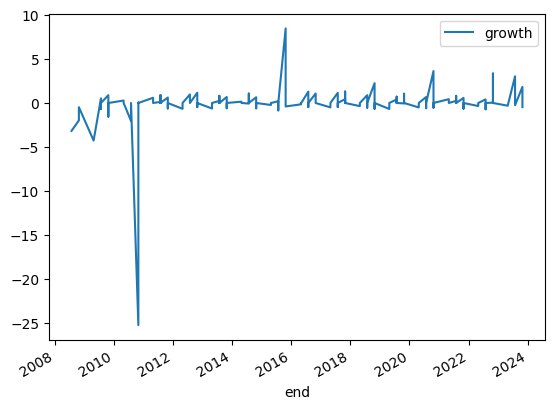

In [49]:
# calculate the growth rate
netincome10Q['val'] = netincome10Q['val'].astype(float)
netincome10Q['end'] = pd.to_datetime(netincome10Q['end'])
netincome10Q = netincome10Q.sort_values(by='end')
netincome10Q['growth'] = netincome10Q['val'].pct_change()
netincome10Q.plot(x='end', y='growth')
plt.show()


In [55]:
# now we can calculate the average growth rate
netincome10Q['growth'].mean()



-0.050466260425322894

In [57]:
# calculate the gross profit
grossprofit = requests.get(f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/GrossProfit.json',headers=headers)
grossprofit.json()

{'cik': 1045810,
 'taxonomy': 'us-gaap',
 'tag': 'GrossProfit',
 'label': 'Gross Profit',
 'description': 'Aggregate revenue less cost of goods and services sold or operating expenses directly attributable to the revenue generation activity.',
 'entityName': 'NVIDIA CORP',
 'units': {'USD': [{'start': '2007-01-29',
    'end': '2008-01-27',
    'val': 1869280000,
    'accn': '0001045810-10-000006',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-03-18',
    'frame': 'CY2007'},
   {'start': '2008-01-25',
    'end': '2008-07-27',
    'val': 664760000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
    'filed': '2009-08-20'},
   {'start': '2008-04-27',
    'end': '2008-07-27',
    'val': 149917000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
    'filed': '2009-08-20',
    'frame': 'CY2008Q2'},
   {'start': '2008-01-28',
    'end': '2008-10-26',
    'val': 1032603000,
    'accn': '000

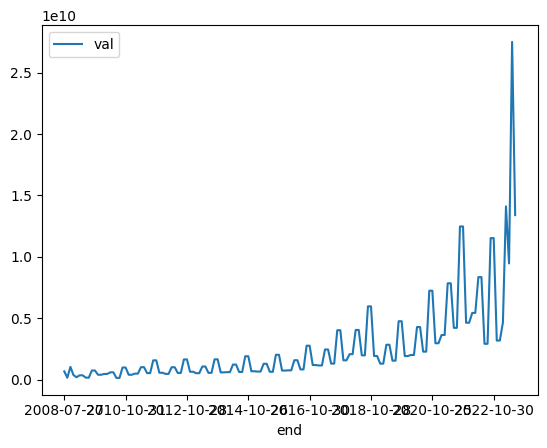

In [59]:
# calculate the growth rate
grossprofitdata = pd.DataFrame.from_dict(grossprofit.json()['units']['USD'])
grossprofit10Q = grossprofitdata[grossprofitdata['form'] == '10-Q']

grossprofit10Q.plot(x='end', y='val')
plt.show()


/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_29229/3510670216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossprofit10Q['val'] = grossprofit10Q['val'].astype(float)
/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_29229/3510670216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossprofit10Q['end'] = pd.to_datetime(grossprofit10Q['end'])


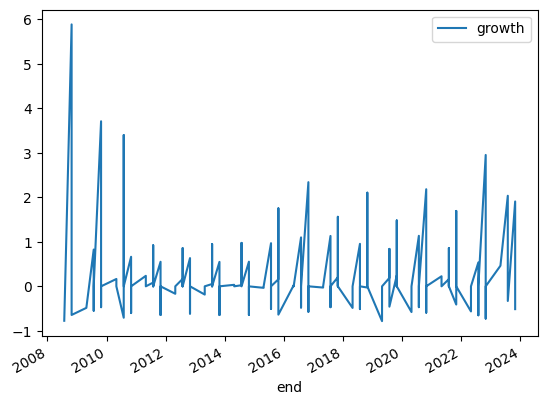

In [60]:
# calculate the growth rate
grossprofit10Q['val'] = grossprofit10Q['val'].astype(float)
grossprofit10Q['end'] = pd.to_datetime(grossprofit10Q['end'])
grossprofit10Q = grossprofit10Q.sort_values(by='end')
grossprofit10Q['growth'] = grossprofit10Q['val'].pct_change()
grossprofit10Q.plot(x='end', y='growth')
plt.show()


In [61]:
# now we can calculate the average growth rate
grossprofit10Q['growth'].mean()


0.22798497832643028

In [63]:
# calculate the operating income
operatingincome = requests.get(f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/OperatingIncomeLoss.json',headers=headers)
operatingincome.json()


{'cik': 1045810,
 'taxonomy': 'us-gaap',
 'tag': 'OperatingIncomeLoss',
 'label': 'Operating Income (Loss)',
 'description': 'The net result for the period of deducting operating expenses from operating revenues.',
 'entityName': 'NVIDIA CORP',
 'units': {'USD': [{'start': '2007-01-29',
    'end': '2008-01-27',
    'val': 836346000,
    'accn': '0001045810-10-000006',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-03-18',
    'frame': 'CY2007'},
   {'start': '2008-01-25',
    'end': '2008-07-27',
    'val': 47587000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
    'filed': '2009-08-20'},
   {'start': '2008-04-27',
    'end': '2008-07-27',
    'val': -155392000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
    'filed': '2009-08-20',
    'frame': 'CY2008Q2'},
   {'start': '2008-01-28',
    'end': '2008-10-26',
    'val': 104383000,
    'accn': '0001045810-09-000036',
    'fy': 2

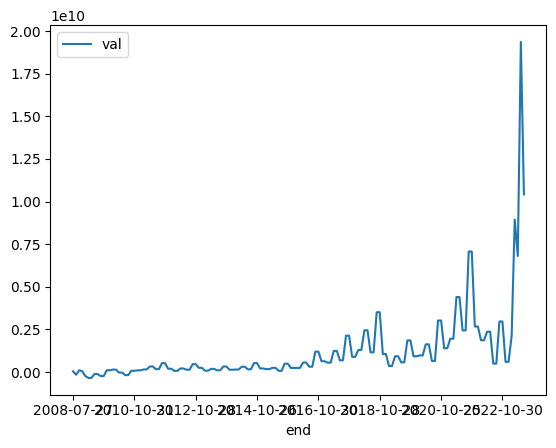

In [64]:
# calculate the growth rate
operatingincomedata = pd.DataFrame.from_dict(operatingincome.json()['units']['USD'])
operatingincome10Q = operatingincomedata[operatingincomedata['form'] == '10-Q']

operatingincome10Q.plot(x='end', y='val')
plt.show()


/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_29229/95821114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operatingincome10Q['val'] = operatingincome10Q['val'].astype(float)
/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_29229/95821114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operatingincome10Q['end'] = pd.to_datetime(operatingincome10Q['end'])


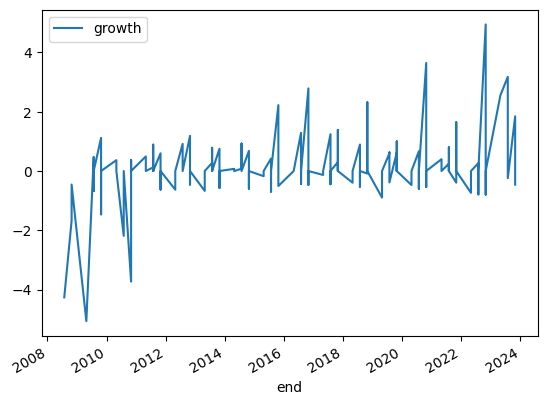

In [65]:
# calculate the growth rate
operatingincome10Q['val'] = operatingincome10Q['val'].astype(float)
operatingincome10Q['end'] = pd.to_datetime(operatingincome10Q['end'])
operatingincome10Q = operatingincome10Q.sort_values(by='end')
operatingincome10Q['growth'] = operatingincome10Q['val'].pct_change()
operatingincome10Q.plot(x='end', y='growth')
plt.show()

In [66]:
# now we can calculate the average growth rate
operatingincome10Q['growth'].mean()

0.09168161804725938

In [67]:
# Free Cash Flow
freecashflow = requests.get(f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/NetCashProvidedByUsedInOperatingActivities.json',headers=headers)
freecashflow.json()



{'cik': 1045810,
 'taxonomy': 'us-gaap',
 'tag': 'NetCashProvidedByUsedInOperatingActivities',
 'label': 'Net Cash Provided by (Used in) Operating Activities',
 'description': 'Amount of cash inflow (outflow) from operating activities, including discontinued operations. Operating activity cash flows include transactions, adjustments, and changes in value not defined as investing or financing activities.',
 'entityName': 'NVIDIA CORP',
 'units': {'USD': [{'start': '2007-01-29',
    'end': '2008-01-27',
    'val': 1270196000,
    'accn': '0001045810-10-000006',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-03-18',
    'frame': 'CY2007'},
   {'start': '2008-01-25',
    'end': '2008-07-27',
    'val': 226202000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
    'filed': '2009-08-20'},
   {'start': '2008-01-28',
    'end': '2008-10-26',
    'val': 269205000,
    'accn': '0001045810-09-000036',
    'fy': 2009,
    'fp': 'Q3',

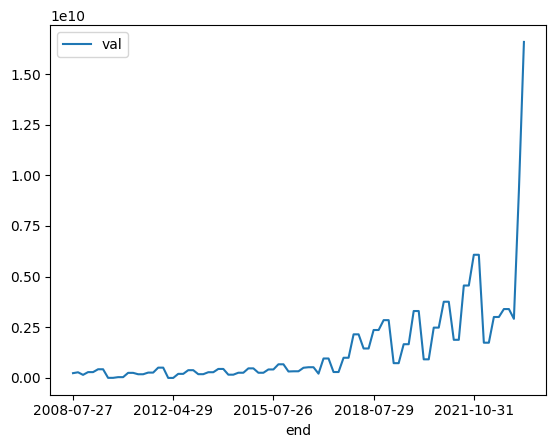

In [68]:
# calculate the growth rate
freecashflowdata = pd.DataFrame.from_dict(freecashflow.json()['units']['USD'])
freecashflow10Q = freecashflowdata[freecashflowdata['form'] == '10-Q']

freecashflow10Q.plot(x='end', y='val')
plt.show()


/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_29229/1409841537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freecashflow10Q['val'] = freecashflow10Q['val'].astype(float)
/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_29229/1409841537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freecashflow10Q['end'] = pd.to_datetime(freecashflow10Q['end'])


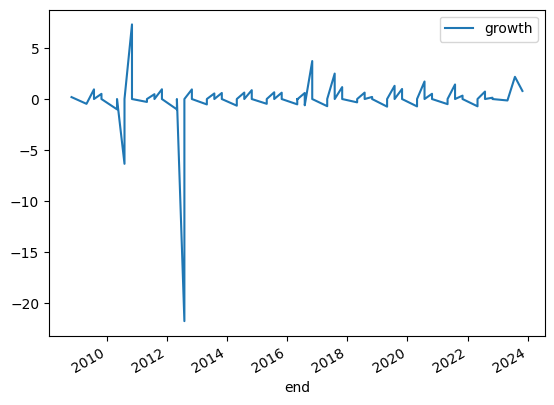

In [69]:
# calculate the growth rate
freecashflow10Q['val'] = freecashflow10Q['val'].astype(float)
freecashflow10Q['end'] = pd.to_datetime(freecashflow10Q['end'])
freecashflow10Q = freecashflow10Q.sort_values(by='end')
freecashflow10Q['growth'] = freecashflow10Q['val'].pct_change()
freecashflow10Q.plot(x='end', y='growth')
plt.show()


In [70]:
# now we can calculate the average growth rate
freecashflow10Q['growth'].mean()

-0.03680369733319401

In [72]:
# get the depreciation
depreciation = requests.get(f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/DepreciationAndAmortization.json',headers=headers)
depreciation.json()


{'cik': 1045810,
 'taxonomy': 'us-gaap',
 'tag': 'DepreciationAndAmortization',
 'label': 'Depreciation, Depletion and Amortization, Nonproduction',
 'description': 'The current period expense charged against earnings on long-lived, physical assets not used in production, and which are not intended for resale, to allocate or recognize the cost of such assets over their useful lives; or to record the reduction in book value of an intangible asset over the benefit period of such asset; or to reflect consumption during the period of an asset that is not used in production.',
 'entityName': 'NVIDIA CORP',
 'units': {'USD': [{'start': '2007-01-29',
    'end': '2008-01-27',
    'val': 133192000,
    'accn': '0001045810-10-000006',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-03-18',
    'frame': 'CY2007'},
   {'start': '2008-01-25',
    'end': '2008-07-27',
    'val': 87664000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
 

In [ ]:
# create a DCF valuation from the data
# project the free cash flow
# calculate the WACC
# calculate the terminal value
# calculate the present value
# calculate the intrinsic value
# compare the intrinsic value with the stock price
# make a decision


In [85]:
# project the free cash flow

fcf_1 = freecashflow10Q['val'].iloc[-1]
fcf_2 = freecashflow10Q['val'].iloc[-2]
fcf_3 = freecashflow10Q['val'].iloc[-3]

# calculate the WACC for NVIDIA

wacc = 0.1
r = 0.05
g = 0.02
terminal_value = (fcf_3 * (1 + g)) / (r - g)
present_value = terminal_value / (1 + r)**3
intrinsic_value = (fcf_1 + fcf_2 + present_value) / (1 + wacc)**1 + (1 + wacc)**2 + (1 + wacc)**3
intrinsic_value


-26792624983.961536

In [86]:
# compare the intrinsic value with the stock price
stock_price = 780
market_cap = 1900000000000
shares_outstanding = market_cap / stock_price
intrinsic_value_per_share = intrinsic_value / shares_outstanding
intrinsic_value_per_share


-10.999077624994737

In [87]:
# make a decision
if stock_price < intrinsic_value_per_share:
    print('Buy the stock')
else:
    print('Do not buy the stock')

Do not buy the stock
